In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from os.path import expanduser
import seaborn as sns
from cmcrameri import cm
from matplotlib import colors
import matplotlib.patches as patches

In [2]:
counts_l = []
counts_l.append({'minvi':600,'name':'minvi-600-2021-12-19-02-35-34','features_isol':86176,'peptides':10535,'sensitivity':12.2,'percent_all_features':55,'hours':15.4})
counts_l.append({'minvi':1000,'name':'minvi-1000-2021-12-17-22-14-22','features_isol':80791,'peptides':10487,'sensitivity':13,'percent_all_features':55,'hours':12.5})
counts_l.append({'minvi':2000,'name':'minvi-2000-2021-12-17-03-11-51','features_isol':67176,'peptides':10235,'sensitivity':15.2,'percent_all_features':54,'hours':8.4})
counts_l.append({'minvi':3000,'name':'minvi-3000-2021-12-19-16-28-05','features_isol':54239,'peptides':9858,'sensitivity':18,'percent_all_features':53,'hours':6})
counts_l.append({'minvi':4000,'name':'minvi-4000-2021-12-20-00-08-59','features_isol':43591,'peptides':9334,'sensitivity':21.4,'percent_all_features':51.2,'hours':4.6})
counts_l.append({'minvi':5000,'name':'minvi-5000-2021-12-20-19-01-47','features_isol':35498,'peptides':8677,'sensitivity':24.4,'percent_all_features':50.3,'hours':3.6})
counts_df = pd.DataFrame(counts_l)

In [12]:
IDENTS_3DID_DIR = '/media/big-ssd/results-P3856_YHE211-3did/{}/P3856_YHE211/identifications-3did'.format(counts_l[0]['name'])
IDENTS_3DID_FILE = '{}/exp-P3856_YHE211-identifications-3did-recalibrated.feather'.format(IDENTS_3DID_DIR)

IDENTS_MQ_DIR = '/media/big-ssd/experiments/P3856_YHE211/identifications-mq'
IDENTS_MQ_FILE = '{}/exp-P3856_YHE211-identifications-mq.feather'.format(IDENTS_MQ_DIR)

IDENTS_TFDE_DIR = '/media/big-ssd/experiments/P3856_YHE211/identifications-pasef'
IDENTS_TFDE_FILE = '{}/exp-P3856_YHE211-identifications-pasef-recalibrated.feather'.format(IDENTS_TFDE_DIR)

In [13]:
idents_3did_df = pd.read_feather(IDENTS_3DID_FILE)
idents_mq_df = pd.read_feather(IDENTS_MQ_FILE)
idents_tfde_df = pd.read_feather(IDENTS_TFDE_FILE)

In [14]:
idents_mq_df = idents_mq_df[idents_mq_df.isotope_count >= 3]

In [15]:
sequences_3did_l = []
for group_name,group_df in idents_3did_df.groupby(['sequence','charge'], as_index=False):
    perc_score = group_df['percolator score'].max()
    mass_accuracy_ppm = group_df.mass_accuracy_ppm.min()
    sequences_3did_l.append({'sequence_key':'{}-{}'.format(group_name[0], group_name[1]), 'perc_score':perc_score, 'mass_accuracy_ppm':mass_accuracy_ppm, 'method':'3DID'})
sequences_3did_df = pd.DataFrame(sequences_3did_l)

In [16]:
sequences_mq_l = []
for group_name,group_df in idents_mq_df.groupby(['sequence','charge'], as_index=False):
    perc_score = group_df['percolator score'].max()
    mass_accuracy_ppm = group_df.mass_accuracy_ppm.min()
    sequences_mq_l.append({'sequence_key':'{}-{}'.format(group_name[0], group_name[1]), 'perc_score':perc_score, 'mass_accuracy_ppm':mass_accuracy_ppm, 'method':'MaxQuant'})
sequences_mq_df = pd.DataFrame(sequences_mq_l)

In [17]:
sequences_tfde_l = []
for group_name,group_df in idents_tfde_df.groupby(['sequence','charge'], as_index=False):
    perc_score = group_df['percolator score'].max()
    mass_accuracy_ppm = group_df.mass_accuracy_ppm.min()
    sequences_tfde_l.append({'sequence_key':'{}-{}'.format(group_name[0], group_name[1]), 'perc_score':perc_score, 'mass_accuracy_ppm':mass_accuracy_ppm, 'method':'TFD/E'})
sequences_tfde_df = pd.DataFrame(sequences_tfde_l)

In [18]:
combined_sequences_df = pd.concat([sequences_3did_df,sequences_mq_df,sequences_tfde_df], axis=0, sort=False, ignore_index=True)

In [19]:
sets_d = {'3DID':set(), 'MaxQuant':set(), 'TFD/E':set()}
for group_name,group_df in combined_sequences_df.groupby(['sequence_key'], as_index=False):
    for method in group_df.method.tolist():
        sets_d[method].add(group_name)

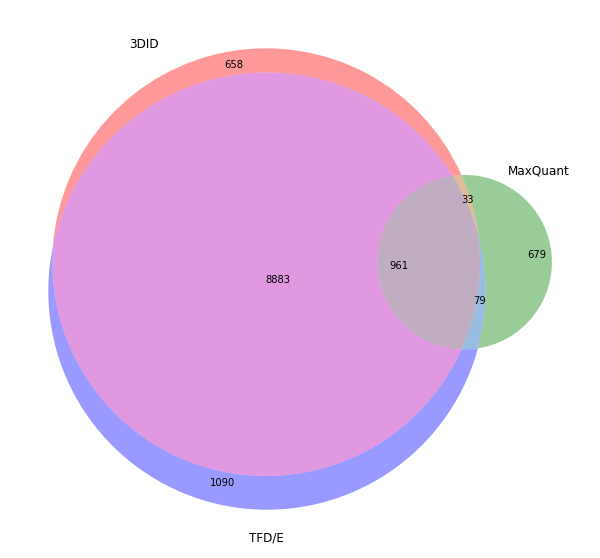

In [20]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

f, ax1 = plt.subplots()
f.set_figheight(10)
f.set_figwidth(15)

plt.margins(0.06)
# plt.title('features identified with minvi={} and minvi={}'.format(MINVI_LOW,MINVI_HIGH))

venn3([sets_d['3DID'],sets_d['MaxQuant'],sets_d['TFD/E']], ('3DID','MaxQuant','TFD/E'))

plt.show()